<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Nice)</span></div>

## 1 MC strategy for integration

## Explore 3 :  Monte Carlo Integration

In [37]:
import numpy as np
import random
x_coord = np.random.uniform(2, 3, int(1e5)) #I am converting it to integer here because 1e5 gives me a float
y_coord = np.random.uniform(0, 6, int(1e5))

y = lambda x: (x**2)*(np.sin(x)**2)

def counter(x_coord,y_coord):
    count = 0
    global y
    for i,j in zip(x_coord,y_coord):
        if y(i) < j:
            count += 1
    return count
blue_area = counter(x_coord,y_coord) / int(1e5) * 6
blue_area

3.9388799999999997

In [38]:
#Generalised functions
def x_generator(n):
    return np.random.uniform(2, 3, int(n))
def y_generator(n):
    return np.random.uniform(0, 6, int(n))
#If I want to make it even more generalised, I will run a lambda function but I am lazy and am interested in keeping my sanity at 9am in the morning
#lambda min,max: np.random.uiform(min,max,n)
y = lambda x: (x**2)*(np.sin(x)**2)
def counter(x_coord, y_coord):
    count = 0
    global y
    for i,j in zip(x_coord,y_coord):
        if y(i) < j:
            count += 1
    return count
blue_area_1e6 = counter(x_generator(1e6), y_generator(1e6)) / int(1e6) * 6
print(blue_area_1e6)

3.9436799999999996


In [39]:
blue_area_1e7 = counter(x_generator(1e7), y_generator(1e7)) / int(1e7) * 6

print(blue_area_1e7)


3.9484884000000005


## 2 Another MC strategy for integration

## Explore 4 :  Integration with an estimator

In [40]:

def function(x):
    return (x**2)*(np.sin(x)**2)
def mce(a,b,n,f):
    values = []
    for i in np.random.uniform(a, b, int(n)):
        values.append(f(i))
    values_array = np.array(values)
    return (b-a)*(1/n)*(np.sum(values_array))
mce(2, 3, 100000, function)

2.051782813898762

# I dont know why I am getting such low values. I am taking a break from this now sadge. Teach me math please

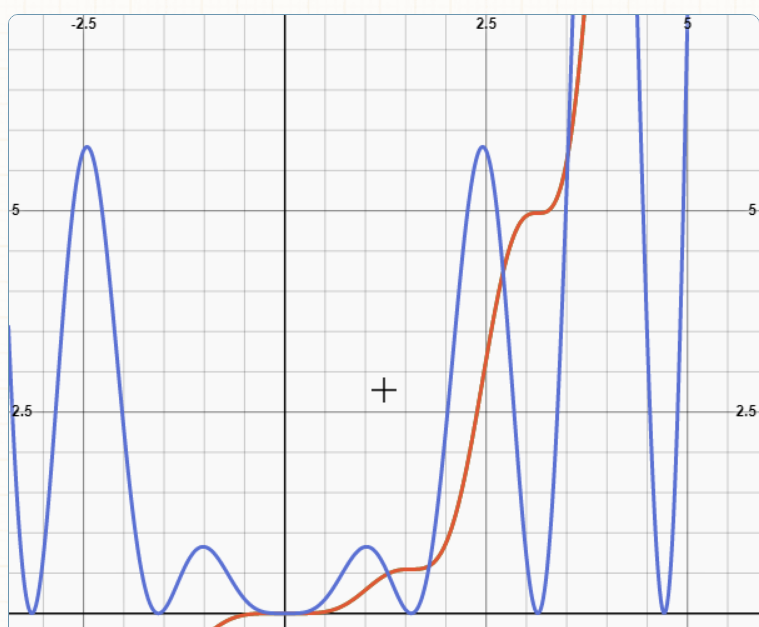

In [43]:
%%timeit
def x_generator(n):
    return np.random.uniform(2, 3, int(n))
def y_generator(n):
    return np.random.uniform(0, 6, int(n))
#If I want to make it even more generalised, I will run a lambda function but I am lazy and am interested in keeping my sanity at 9am in the morning
#lambda min,max: np.random.uiform(min,max,n)
y = lambda x: (x**2)*(np.sin(x)**2)
def counter(x_coord, y_coord):
    count = 0
    global y
    for i,j in zip(x_coord,y_coord):
        if y(i) < j:
            count += 1
    return count
blue_area_1e6 = counter(x_generator(1e6), y_generator(1e6)) / int(1e6) * 6

1.5 s ± 18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [44]:
%%timeit
def function(x):
    return (x**2)*(np.sin(x)**2)
def mce(a,b,n,f):
    values = []
    for i in np.random.uniform(a, b, int(n)):
        values.append(f(i))
    values_array = np.array(values)
    return (b-a)*(1/n)*(np.sum(values_array))
mce(2, 3, int(1e6), function)

1.46 s ± 20.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Around there